<a href="https://colab.research.google.com/github/byrocuy/twitter-NLP-iphone-pixel/blob/main/sentiment_analysis_vader_roberta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Sentimen pada Launching Smartphone Iphone 14 dan Google Pixel 7 menggunakan Tweepy dan SNScrape pada data Twitter  



---

<br>

NAMA: ROBY ATTOILLAH  
NIM: 19/444068/TK/49264  

<br>
github repository: https://github.com/byrocuy/twitter-NLP-iphone-pixel  
<br>
PPT: https://www.canva.com/design/DAFOoRQGP2A/2NhENBP3qmwL1tlMSSjK7g/view?utm_content=DAFOoRQGP2A&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton



---



## 1. Latar Belakang

Pada tahun 2022 ini, perusahaan raksasa Apple dan Google masing-masing meluncurkan smartphone terbarunya. Pada 16 September 2022, Apple secara resmi merilis Iphone 14, Iphone 14 Pro dan Pro Max. Iphone versi terbaru ini mengenalkan beberapa fitur yang membuatnya semakin menarik, di antaranya adalah fitur Always on Display, Crash Detection, Dynamic Island, dan lainnya. Sementara itu, Google mempertunjukkan Pixel 7 dan varian Pronya pada 6 Oktober 2022. Meskipun tanggal resmi rilisnya adalah 13 Oktober 2022, beberapa tech reviewer dan beberapa orang khusus secara eksklusif telah memegang smartphone Google terbaru ini dengan memostingnya di kanal Youtube atau akun Twitter mereka. Tak kalah dengan Iphone 14, Pixel 7 dan 7 Pro juga memiliki berbagai macam fitur terbaru dan penyegaran desain untuk meningkatkan pengalaman pengguna baik secara hardware maupun software.  
<br>
<br>
Melihat antusiasme netizen dan tech-reviewer terhadap launching kedua smartphone tersebut, penulis melakukan eksplorasi bagaimana impresi netizen terhadap kedua smartphone tersebut. Analisis impresi dilakukan dengan menggunakan _sentiment analysis_ pada cuitan pengguna Twitter berdasarkan teks cuitan yang mengandung keyword 'Iphone 14' dan 'Pixel 7'. Metode analisis sentimen yang digunakan adalah VADER (Valence Aware Dictionary and sEntiment Reasoner) dan RoBERTa (Robustly Optimized BERT Pretraining Approach) pada setiap cuitan untuk melihat impresi netizen apakah negatif, netral, atau positif terhadap launching produk tersebut. Selanjutnya hasil analisis diplotkan menggunakan grafik batang untuk melihat perbandingan impresi yang ada pada kedua produk.  
<br>
<br>
Batasan:  
- Karena Pixel 7 baru diumumkan oleh Google tiga hari yang lalu, maka pengambilan data dibatasi hanya tiga hari saja semenjak pengumuman/peluncurannya.  
- Jumlah cuitan yang diambil hanya sekitar 1000 cuitan saja, tidak termasuk retweet dan replies.
- Cuitan yang diambil hanya yang menggunakan bahasa inggris saja
<br>
<br>
<br>


---



## 2. Metode

### 2.1 VADER  


### 2.2 RoBERTa

## 3. KODE

### 3.1 Instalasi dan Importing Library yang dibutuhkan

In [1]:
!pip3 install tweepy --upgrade
!pip3 install snscrape
!pip install emoji
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 94 kB 2.7 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: tweepy
    Found existing installation: tweepy 3.10.0
    Uninstalling tweepy-3.10.0:
      Successfully uninstalled tweepy-3.10.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 15.5 MB/s 
  Created wheel for emoji: filename=emoji-2.1.0-py3-none-any.whl size=212392 sha256=96e5bd2dd5a8719250b42e2704ee1cacefc1bd302f0438aeed15da1ccf0503e5
  Stored in directory: /root/.cache/pip/wheels/77/75/99/51c2a119f4

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from tqdm import tqdm

import snscrape.modules.twitter as sntwitter
import tweepy
import emoji

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

plt.style.use('ggplot')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [3]:
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAJC9hwEAAAAAgsUaAHzWfxOkpOdZ4I%2BmDsU94sE%3D01LytPn61Pj3RrXDnVSa0Bb0uzhT5p4wilywrbBf3U7YoL93VN'

client = tweepy.Client(bearer_token=bearer_token)

In [4]:
def clean(tweet):
    # Clean hashtag and convert emoji
    tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split())
    tweet =  emoji.demojize(tweet, delimiters=(" ", " "))
    return tweet

### 3.2 Scraping Data Twitter

#### 3.2.1 GET Pixel 7 Tweet  
Scraping tweet dengan topik Pixel 7 dapat menggunakan Tweepy dan API resmi dari Twitter.  

Pencarian tweet relevan menggunakan kueri 'Pixel 7 lang:en' yang memfilter hanya mengenai topik Pixel 7 dan menggunakan bahasa Inggris.

In [48]:
tweet_counts = 1000

columns = ['id', 'Date Created', 'Tweet']

In [44]:
tweets_pixel = []
query_pixel = 'Pixel 7 lang:en'

# Using TwitterSearchScraper to scrape data and append tweets to list
for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query_pixel).get_items()):
    if i > tweet_counts - 1:
        break
    tweets_pixel.append([tweet.id, tweet.date, clean(tweet.content)])
    
# Creating a dataframe from the tweets list above
tweets_df_pixel = pd.DataFrame(tweets_pixel, columns=columns)

In [45]:
tweets_df_pixel.head()

,id,Date Created,Tweet
0,1579422604657451008,2022-10-10 10:44:27+00:00,The Pixel 7 Pro has an updated internal layout...
1,1579421567435448321,2022-10-10 10:40:20+00:00,The Google Pixel 7 and 7 Pro will go on sale l...
2,1579421510871416832,2022-10-10 10:40:07+00:00,Enjoy a free pair of Google Pixel Buds Pro wit...
3,1579421419456565249,2022-10-10 10:39:45+00:00,For rapists and child killers it would be yes ...
4,1579420797453889536,2022-10-10 10:37:16+00:00,Google Pixel 7 Pixel 7 Pro Pixel Watch Launch ...


In [47]:
tweets_df_pixel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   id            1000 non-null   int64              
 1   Date Created  1000 non-null   datetime64[ns, UTC]
 2   Tweet         1000 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(1)
memory usage: 23.6+ KB


In [51]:
# tweets_df_pixel.to_csv('/content/drive/MyDrive/pixel1000tweets.csv')

#### 3.2.2 GET Iphone 14 Tweet  
Scraping tweet dengan topik Iphone 14 menggunakan SNScrape karena periode peluncuran resmi produk lebih dari 7 hari yang lalu. API resmi Twitter hanya memberikan periode penarikan data kurang dari 7 hari untuk pengguna biasa. Sementara untuk mengambil data lebih lama dari itu harus menaikkan akses, misalnya sebagai academic researcher.

In [39]:
tweets_iphone = []

# Using TwitterSearchScraper to scrape data and append tweets to list
query_iphone = 'iphone 14 until:2022-09-19 since:2022-09-16 lang:en'

for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query_iphone).get_items()):
    if i > tweet_counts - 1:
        break
    tweets_iphone.append([tweet.id, tweet.date, clean(tweet.content)])
    
# Creating a dataframe from the tweets list above
tweets_df_iphone = pd.DataFrame(tweets_iphone, columns=columns)

In [40]:
tweets_df_iphone.head()

,id,Date Created,Tweet
0,1571650253866303489,2022-09-18 23:59:55+00:00,iPhone 14 satellite connectivity enabled by Qu...
1,1571650235260370944,2022-09-18 23:59:50+00:00,I just turned off ProMotion (or rather capped ...
2,1571650213487542272,2022-09-18 23:59:45+00:00,Protect your iPhone 14/14 Plus/14 Pro/14 Pro M...
3,1571650160832421890,2022-09-18 23:59:32+00:00,_gem The timing is suspicious Apple trying to ...
4,1571650106021257216,2022-09-18 23:59:19+00:00,Indian man flies to Dubai to buy iPhone 14 spe...


In [43]:
tweets_df_iphone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   id            1000 non-null   int64              
 1   Date Created  1000 non-null   datetime64[ns, UTC]
 2   Tweet         1000 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(1)
memory usage: 23.6+ KB


In [52]:
# tweets_df_iphone.to_csv('/content/drive/MyDrive/iphone1000tweets.csv')

### 3.3 SENTIMENT ANALYSIS

#### 3.3.1 VADER

##### 3.3.1.2 VADERS PIXEL 7 SCORING

In [53]:
sia = SentimentIntensityAnalyzer()

In [54]:
res = []
for i, row in tqdm(tweets_df_pixel.iterrows(), total=len(tweets_df_pixel)):
    text = row['Tweet']
    sen = sia.polarity_scores(text)
    val = ''
    if sen['compound'] > 0:
        val = 'positive'
    elif sen['compound'] == 0:
        val = 'neutral'
    else:
        val = 'negative'
    
    res.append([row['id'], sen['neg'], sen['neu'], sen['compound'], val])

100%|██████████| 1000/1000 [00:01<00:00, 869.14it/s]


In [55]:
vanders_pixel = pd.DataFrame(res, columns=['id', 'neg', 'neu', 'pos', 'sen'])
vaders_pixel = vanders_pixel.merge(tweets_df_pixel, how='left')

In [56]:
vaders_pixel.head()

,id,neg,neu,pos,sen,Date Created,Tweet
0,1579422604657451008,0.000,0.805,0.4404,positive,2022-10-10 10:44:27+00:00,The Pixel 7 Pro has an updated internal layout...
1,1579421567435448321,0.000,0.963,0.1779,positive,2022-10-10 10:40:20+00:00,The Google Pixel 7 and 7 Pro will go on sale l...
2,1579421510871416832,0.000,0.542,0.8999,positive,2022-10-10 10:40:07+00:00,Enjoy a free pair of Google Pixel Buds Pro wit...
3,1579421419456565249,0.319,0.433,-0.2023,negative,2022-10-10 10:39:45+00:00,For rapists and child killers it would be yes ...
4,1579420797453889536,0.000,1.000,0.0000,neutral,2022-10-10 10:37:16+00:00,Google Pixel 7 Pixel 7 Pro Pixel Watch Launch ...


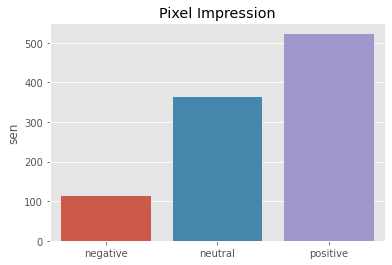

In [57]:
ax = sns.barplot(data=vaders_pixel, x=vaders_pixel.sen.value_counts().index, y=vaders_pixel.sen.value_counts(), order = ['negative', 'neutral', 'positive'])
ax.set_title('Pixel Impression')
plt.show()

##### 3.3.1.2 VADERS IPHONE 14 SCORING

In [58]:
res_ip = []
for i, row in tqdm(tweets_df_iphone.iterrows(), total=len(tweets_df_iphone)):
    text = row['Tweet']
    sen = sia.polarity_scores(text)
    val = ''
    if sen['compound'] > 0:
        val = 'positive'
    elif sen['compound'] == 0:
        val = 'neutral'
    else:
        val = 'negative'
    
    res_ip.append([row['id'], sen['neg'], sen['neu'], sen['compound'], val])

100%|██████████| 1000/1000 [00:00<00:00, 2646.20it/s]


In [59]:
vanders_iphone = pd.DataFrame(res_ip, columns=['id', 'neg', 'neu', 'pos', 'sen'])
vaders_iphone = vanders_iphone.merge(tweets_df_pixel, how='left')

In [60]:
vaders_iphone.head()

,id,neg,neu,pos,sen,Date Created,Tweet
0,1571650253866303489,0.000,1.000,0.0000,neutral,NaT,NaN
1,1571650235260370944,0.000,0.839,0.5362,positive,NaT,NaN
2,1571650213487542272,0.000,0.843,0.3818,positive,NaT,NaN
3,1571650160832421890,0.143,0.857,-0.3612,negative,NaT,NaN
4,1571650106021257216,0.000,1.000,0.0000,neutral,NaT,NaN


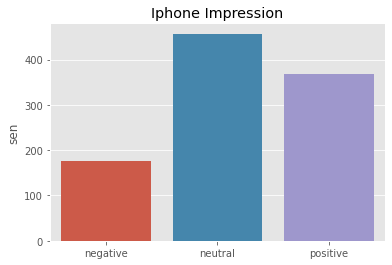

In [61]:
ax = sns.barplot(data=vaders_iphone, x=vaders_iphone.sen.value_counts().index, y=vaders_iphone.sen.value_counts(), order = ['negative', 'neutral', 'positive'])
ax.set_title('Iphone Impression')
plt.show()

##### Conclusion on VADER Model

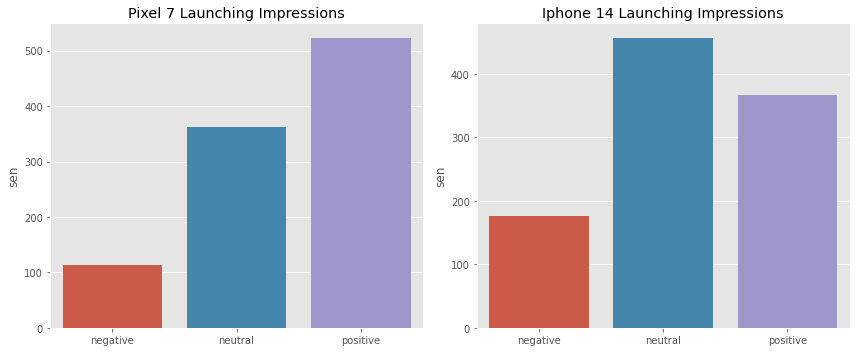

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(data=vaders_pixel, x=vaders_pixel.sen.value_counts().index, y=vaders_pixel.sen.value_counts(), order = ['negative', 'neutral', 'positive'], ax=axs[0])
sns.barplot(data=vaders_iphone, x=vaders_iphone.sen.value_counts().index, y=vaders_iphone.sen.value_counts(), order = ['negative', 'neutral', 'positive'], ax=axs[1])
axs[0].set_title('Pixel 7 Launching Impressions')
axs[1].set_title('Iphone 14 Launching Impressions')
plt.tight_layout()
plt.show()

#### 3.3.2 ROBERTA PRETRAINED MODEL

In [63]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [64]:
def polarity_scores_roberta(tweet):
    encoded_text = tokenizer(tweet, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
ex = polarity_scores_roberta("I really love this!")
ex[max(ex, key=ex.get)]

0.98944527

##### 3.3.2.1 RoBERTa pada cuitan Pixel 7

In [65]:
res_roberta_pix = []
for i, row in tqdm(tweets_df_pixel.iterrows(), total=len(tweets_df_pixel)):
    try:
        text = row['Tweet']
        myid = row['id']
        roberta_result = polarity_scores_roberta(text)
        # Take the maximum value
        max_roberta = max(roberta_result, key=roberta_result.get)
        val = ''
        if max_roberta == 'roberta_pos':
            val = 'positive'
        elif max_roberta == 'roberta_neu':
            val = 'neutral'
        else:
            val = 'negative'
        
        res_roberta_pix.append([row['id'], roberta_result['roberta_neg'], roberta_result['roberta_neu'], roberta_result['roberta_pos'], val])
    except RuntimeError:
        print(f'Broke for id {myid}')

100%|██████████| 1000/1000 [02:36<00:00,  6.40it/s]


In [66]:
results_df = pd.DataFrame(res_roberta_pix, columns=['id', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'roberta_sentiment'])
results_df = results_df.merge(tweets_df_pixel, how='left')

In [67]:
results_df.head()

,id,roberta_neg,roberta_neu,roberta_pos,roberta_sentiment,Date Created,Tweet
0,1579422604657451008,0.001181,0.104620,0.894199,positive,2022-10-10 10:44:27+00:00,The Pixel 7 Pro has an updated internal layout...
1,1579421567435448321,0.047816,0.546882,0.405303,neutral,2022-10-10 10:40:20+00:00,The Google Pixel 7 and 7 Pro will go on sale l...
2,1579421510871416832,0.000806,0.011336,0.987858,positive,2022-10-10 10:40:07+00:00,Enjoy a free pair of Google Pixel Buds Pro wit...
3,1579421419456565249,0.774144,0.216589,0.009268,negative,2022-10-10 10:39:45+00:00,For rapists and child killers it would be yes ...
4,1579420797453889536,0.001445,0.337161,0.661394,positive,2022-10-10 10:37:16+00:00,Google Pixel 7 Pixel 7 Pro Pixel Watch Launch ...


In [68]:
results_df.roberta_sentiment.value_counts()

positive    512
neutral     424
negative     64
Name: roberta_sentiment, dtype: int64

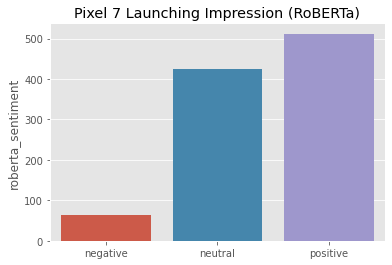

In [69]:
ax = sns.barplot(data=results_df, x=results_df.roberta_sentiment.value_counts().index, y=results_df.roberta_sentiment.value_counts(), order = ['negative', 'neutral', 'positive'])
ax.set_title('Pixel 7 Launching Impression (RoBERTa)')
plt.show()

##### 3.3.2.2 RoBERTa on Iphone 14

In [70]:
res_roberta_ip = []
for i, row in tqdm(tweets_df_iphone.iterrows(), total=len(tweets_df_iphone)):
    try:
        text = row['Tweet']
        myid = row['id']
        roberta_result = polarity_scores_roberta(text)
        # Take the maximum value
        max_roberta = max(roberta_result, key=roberta_result.get)
        val = ''
        if max_roberta == 'roberta_pos':
            val = 'positive'
        elif max_roberta == 'roberta_neu':
            val = 'neutral'
        else:
            val = 'negative'
        
        res_roberta_ip.append([row['id'], roberta_result['roberta_neg'], roberta_result['roberta_neu'], roberta_result['roberta_pos'], roberta_result[max_roberta], val])
    except RuntimeError:
        print(f'Broke for id {myid}')

100%|██████████| 1000/1000 [02:33<00:00,  6.51it/s]


In [71]:
results_df_ip = pd.DataFrame(res_roberta_ip, columns=['id', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'val', 'roberta_sentiment'])
results_df_ip = results_df_ip.merge(tweets_df_iphone, how='left')

In [72]:
results_df_ip.head()

,id,roberta_neg,roberta_neu,roberta_pos,val,roberta_sentiment,Date Created,Tweet
0,1571650253866303489,0.004158,0.370442,0.625400,0.625400,positive,2022-09-18 23:59:55+00:00,iPhone 14 satellite connectivity enabled by Qu...
1,1571650235260370944,0.019927,0.135849,0.844224,0.844224,positive,2022-09-18 23:59:50+00:00,I just turned off ProMotion (or rather capped ...
2,1571650213487542272,0.004805,0.276850,0.718345,0.718345,positive,2022-09-18 23:59:45+00:00,Protect your iPhone 14/14 Plus/14 Pro/14 Pro M...
3,1571650160832421890,0.391110,0.499460,0.109430,0.499460,neutral,2022-09-18 23:59:32+00:00,_gem The timing is suspicious Apple trying to ...
4,1571650106021257216,0.089446,0.842970,0.067583,0.842970,neutral,2022-09-18 23:59:19+00:00,Indian man flies to Dubai to buy iPhone 14 spe...


In [73]:
results_df_ip.roberta_sentiment.value_counts()

positive    439
neutral     431
negative    130
Name: roberta_sentiment, dtype: int64

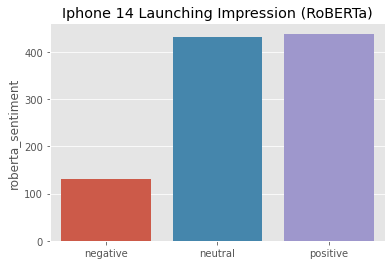

In [74]:
ax = sns.barplot(data=results_df_ip, x=results_df_ip.roberta_sentiment.value_counts().index, y=results_df_ip.roberta_sentiment.value_counts(), order = ['negative', 'neutral', 'positive'])
ax.set_title('Iphone 14 Launching Impression (RoBERTa)')
plt.show()